### Libraries
Libraries we will be using in this quick tutorial are matplotlib and numpy.

This example was developed by Let's Code Physics and translated/updated for Python 3 and this Jupyter Notebook by B. Stottrup: last updated 2.18.2021

In [2]:
import numpy as np  #loads and renames numpy.  This is the Python workhorse tool for math
import matplotlib.pyplot as plt #Loads the standard Graphing Package -simiar to Matlab

We will be interpolating this simple gaussian distribution

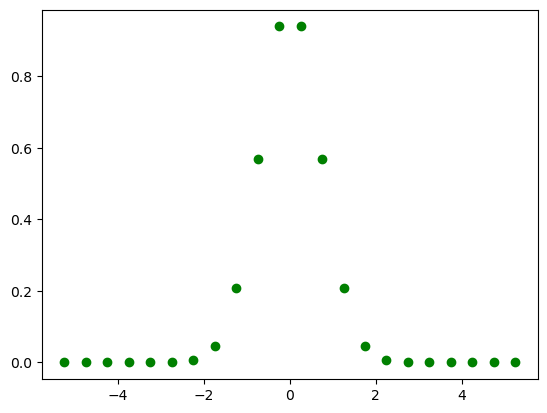

In [3]:
data = []
x = -5.25
dx = 0.5
while (x<5.26):
    data.append((x,np.exp(-x**2)))
    x = x + dx
data = np.array(data)   
plt.plot(data[:,0],data[:,1],'go')

The cell below does a simple linear interpolation data between points.  The interpolated points meet the constraint that they have an equal slope during each segment.

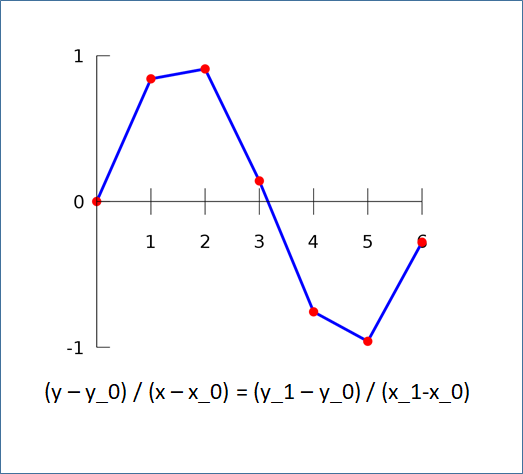

References for Linear Inperolation:
    Wikipedia: https://en.wikipedia.org/wiki/Linear_interpolation
    Wolfram Alpha: https://mathworld.wolfram.com/Interpolation.html
    
    
    

In [4]:
def linear_interp(x_new,data):
    # Be sure the list data is ordered by increasing x.
    j = 0
    while (data[j][0]<x_new and data[j+1][0]<x_new):
        j = j + 1
    x_left = data[j][0]
    x_right = data[j+1][0]
    y_left = data[j][1]
    y_right = data[j+1][1]

    slope = (y_right-y_left)/(x_right-x_left)
    intercept = y_left-slope*x_left
    y_new = slope*x_new+intercept

    return y_new

In [5]:
# In this cell we simply create a data set of linearly interpolated values.

x_interp = []
y_interp = []
x = -5
dx = 0.05
while (x<5):
    y = linear_interp(x,data)
    x_interp.append(x)
    y_interp.append(y)
    x = x + dx
    
x_interp = np.array(x_interp)
y_interp = np.array(y_interp)

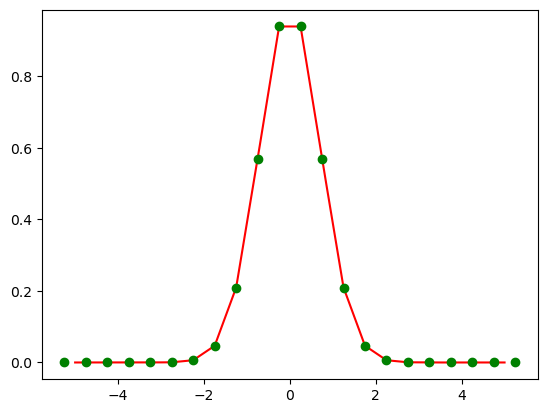

In [6]:
plt.plot(x_interp,y_interp,'r')
plt.plot(data[:,0],data[:,1],'go')

The Method of Lagrange Interpolation fits a set of x data points to a polynomial function of order x-1.  The function is cleverly and simply defined so that an x-1 degree polynomial will yield the values of y given the data.  All points in between are then defined as well.  Here is the Wikipedia page of the definition.

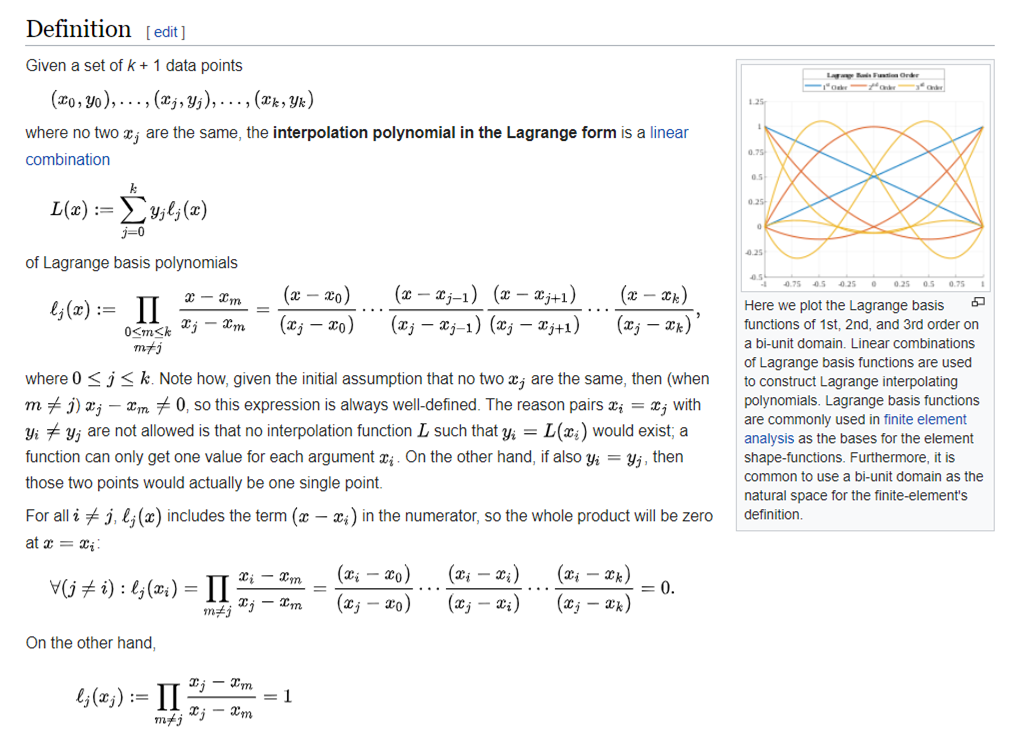

Here are some resources for Lagrange Interpolation:
https://en.wikipedia.org/wiki/Lagrange_polynomial
https://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html


In [7]:
def lagr_poly(x,data):
    lp = 0 # Lagrange polynomial value at x.
    for j in range(0,len(data)):
        coeff = 1
        for i in range(0,len(data)):
            if (i != j):
                coeff = coeff*(x-data[i][0])/(data[j][0]-data[i][0])
        lp = lp + coeff*data[j][1]
    return lp

In [8]:
lagr_interp = []
x = -5
dx = 0.05
while (x<5):
    lagr_interp.append(lagr_poly(x,data))
    x = x + dx

lagr_interp = np.array(lagr_interp)

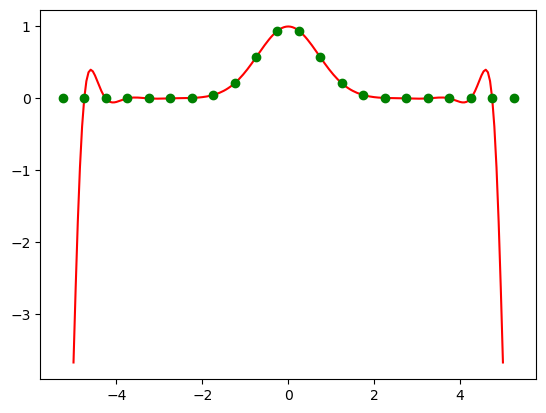

In [9]:
plt.plot(x_interp,lagr_interp,'r')
plt.plot(data[:,0],data[:,1],'go')

### Cubic Function Around our Data Set
This looks pretty good and for much of the data would provide the right values.  However... We had ~25 data points... and a function that is of order 24 is not something that seems very physical.  Have you ever seen a function like that?  So... what can we do?  Well we could maybe try to use a smaller chunk of our data set and sort of iteratively fit our data...  That might give a better fit at the edges of our data, but it still won't have a good physical interpretation.

In [ ]:
def cubic_around(x,data):
    # Be sure the list data is ordered by increasing x.
    jmin = 0
    for j in range(0,len(data)-3):
        if (data[j][0]<x and data[j+1][0]<x and data[j+2][0]>x and data[j+3][0]>x):
            jmin = j

    lp = 0 # Lagrange polynomail value at x.
    for j in range(jmin,jmin+4):
        coeff = 1
        for i in range(jmin,jmin+4):
            if (i != j):
                coeff = coeff*(x-data[i][0])/(data[j][0]-data[i][0])
        lp = lp + coeff*data[j][1]
    return lp

In [ ]:
cub_lagr = []
x_interp = []
deriv = []

x = -4.5
dx = 0.05
while (x<4.5):
#    lp_plot.plot(pos=(x,lagrn_interp(x,data)))
#    lp_plot.plot(pos=(x,cubic_around(x,data)))

    cub_lagr.append(cubic_around(x,data))
    x_interp.append(x)
    deriv.append((cubic_around(x+dx,data)-cubic_around(x,data))/dx)
    x = x + dx

cub_lagr = np.array(cub_lagr)
x_interp = np.array(x_interp)


In [ ]:
plt.plot(x_interp,cub_lagr,'r')
plt.plot(x_interp,deriv,'b--')
plt.plot(data[:,0],data[:,1],'go')

### Cubic Splines

One of the most common ways to do interpolation is to use a cubic spline.  At each point in our interpolation we define a third order polynomial.  The great thing about this approach is that it finds our interpolating function by fitting both the points and the derivatives of the functions.  4 equations and 4 unknowns!!!  for that one data point...  Linear Algebra...

We solve for the coefficients using the constraints below:

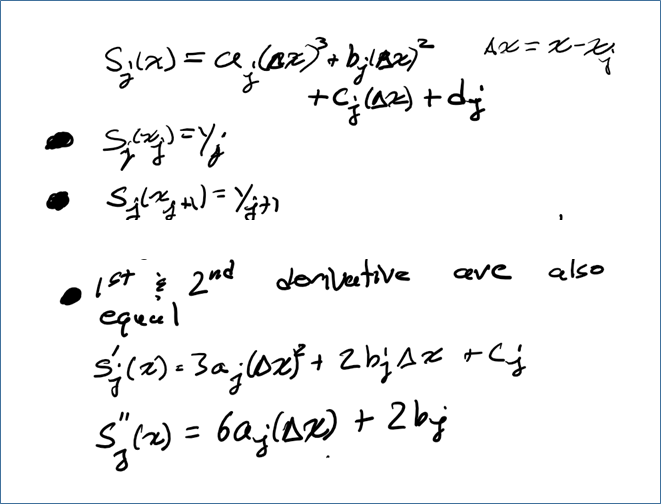


Resources for cubic splines:
Wikipedia: https://en.wikipedia.org/wiki/Spline_interpolation

Wolfram Alpha: https://mathworld.wolfram.com/CubicSpline.html#:~:text=A%20cubic%20spline%20is%20a,equations.


The advantanges of this method is that the interpolated curve well fits the data and it has a continuous derivative.  However, this is a system of linear equations that sort of goes beyond our understanding.

In [ ]:
def make_spline(data):
    # Returns sets of coefficients to create a cubic spline through points
    # contained in data. In each region x_i < x < x_i+1, the spline is
    # given by a_i*(x-x_i)^3 + b_i*(x-x_i)^2 + c_i*(x-x_i) + d_i.
    # The output is is a list of lists make_spline = [a,b,c,d].

    # Solve for ssp in the matrix equation T*ssp = r.
    # at, bt, and ct are the elements of the tridiagonal matrix T.
    # r is the column vector on the right-hand side.
    # ssd holds the values of the second derivative of the spline polynomial
    # at each data point.
    bt = [1]
    at = [0]
    ct = [data[1][0]-data[0][0]]
    r = [0]
    for i in range(1,len(data)-1):
        bt.append(2*( data[i+1][0]-data[i-1][0]))
        ct.append(data[i+1][0]-data[i][0])
        at.append(data[i][0]-data[i-1][0])
        r1 = (data[i+1][1]-data[i][1])/(data[i+1][0]-data[i][0]) 
        r1 = r1 - (data[i][1]-data[i-1][1])/(data[i][0]-data[i-1][0])
        r.append(6*r1)
        
    at.append(data[len(data)-1][0]-data[len(data)-2][0])
    bt.append(1)
    ct.append(0)
    r.append(0)
    
    # Solve the matrix equation for ssd.
    beta = [bt[0]] # beta and rho are short-hand variables.
    rho = [r[0]]
    ssd = [0]
    for j in range(1,len(data)):
        beta.append( bt[j]-at[j]*ct[j-1]/beta[j-1] )
        rho.append( r[j]-at[j]*rho[j-1]/beta[j-1] )
        ssd.append(0)
    
    ssd[len(data)-1] = rho[len(data)-1]/beta[len(data)-1]
    for j in range(2,len(data)-2,1):
        ssd[len(data)-j] = ( rho[len(data)-j]-ct[len(data)-j]*ssd[len(data)-j+1] ) / beta[len(data)-j]

    
    # Spline has been determined. Prepare output.
    a = []
    b = []
    c = []
    d = []
    
    for i in range(0,len(data)-1):
        d.append(data[i][1])
        b.append(ssd[i]/2)
        a.append((ssd[i+1]-ssd[i])/(6*(data[i+1][0]-data[i][0])))
        c1 = (data[i+1][1]-data[i][1])/(data[i+1][0]-data[i][0])
        c1 = c1-((data[i+1][0]-data[i][0])*(ssd[i+1]+2*ssd[i])/6)
        c.append(c1)
        
    return [a,b,c,d]

In [ ]:
my_spline = make_spline(data)
a = my_spline[0]
b = my_spline[1]
c = my_spline[2]
d = my_spline[3]

spline_vals = []

x = -5
dx = 0.01
while (x<5.1):
    # Find the data point to the left of x.
    j = 0
    while (data[j+1][0] < x):
        j = j + 1
    xdiff = x-data[j][0]
    spline_vals.append((x,a[j]*xdiff**3+b[j]*xdiff**2+c[j]*xdiff+d[j]))
    x = x + dx

# creating a list of arrays
spline_x = []
spline_y = []    
sfd = []
ssd = []

# defining the spline and its first and second derivative
for i in range(1,len(spline_vals)-1):
    spline_x.append(spline_vals[i][0])
    spline_y.append(spline_vals[i][1])
    
    sfd_q = (spline_vals[i+1][1]-spline_vals[i][1])/(spline_vals[i+1][0]-spline_vals[i][0])
    sfd.append(sfd_q)
    
    ssd_q = (spline_vals[i+1][1]-2*spline_vals[i][1]+spline_vals[i-1][1])/(0.5*(spline_vals[i+1][0]-spline_vals[i-1][0]))**2
    ssd.append(ssd_q)
    

In [ ]:
#Here we plot the data, spline, and the first and second derivatives of the function.

plt.plot(spline_x,spline_y)
plt.plot(spline_x,sfd)
plt.plot(spline_x,ssd)
plt.plot(data[:,0],data[:,1],'go')